In [1]:
import warnings
warnings.filterwarnings('always')

# Prepare datasets

In [2]:
from heart_disease_dataset.transformation_pipeline import get_transformed_data

X, y = get_transformed_data()

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:91

In [3]:
X.shape, y.size

((303, 13), 303)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# kNN

In [6]:
from kNN.model import kNNClassifier

knn = kNNClassifier(nearest_neighbors_max_count=300)
knn.fit(X_train, y_train)

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()


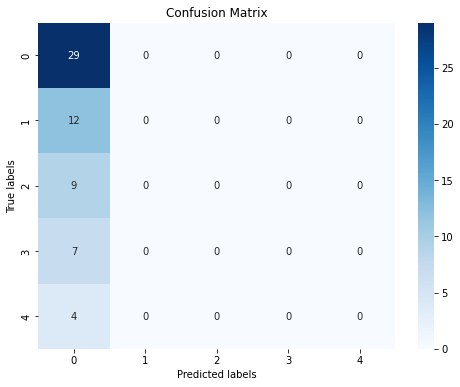

Precision: 0.2260145122278957
Recall: 0.47540983606557374
F1-Score: 0.3063752276867031


/home/olga/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from display_statistics import plot_confusion_matrix, print_numerical_statistics

prediction = [knn.predict(test_case) for test_case in X_test]
plot_confusion_matrix(y_test, prediction)
print_numerical_statistics(y_test, prediction)

In [8]:
print_numerical_statistics(y_test, prediction)

Precision: 0.2260145122278957
Recall: 0.47540983606557374
F1-Score: 0.3063752276867031


/home/olga/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Perceptron

In [9]:
from perceptron.model import PerceptronClassifier

perceptron = PerceptronClassifier(learning_rate=0.4)
perceptron.fit(X_train, y_train, 500)

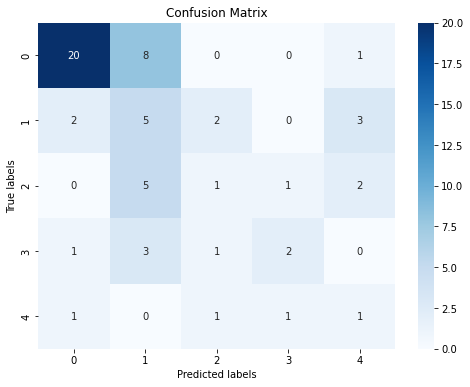

Precision: 0.5392661982825918
Recall: 0.47540983606557374
F1-Score: 0.493140945043203


In [10]:
prediction = [perceptron.predict(test_case) for test_case in X_test]
plot_confusion_matrix(y_test, prediction)
print_numerical_statistics(y_test, prediction)

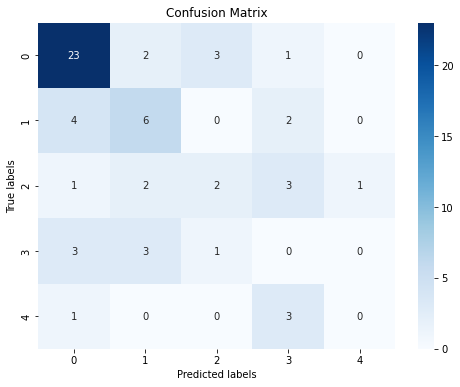

Precision: 0.4816755989911728
Recall: 0.5081967213114754
F1-Score: 0.4922762698199409


In [11]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

prediction = decision_tree.predict(X_test)

plot_confusion_matrix(y_test, prediction)
print_numerical_statistics(y_test, prediction)

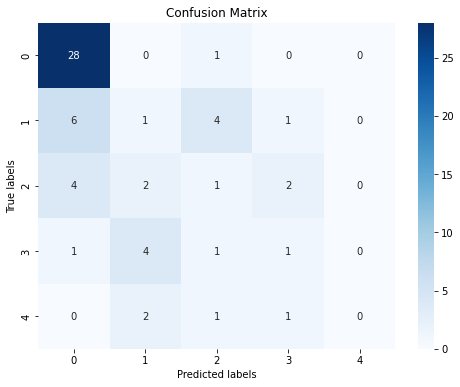

Precision: 0.4045712484237074
Recall: 0.5081967213114754
F1-Score: 0.44673279147724665


/home/olga/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.ensemble import RandomForestClassifier

random_foresr = RandomForestClassifier()
random_foresr.fit(X_train, y_train)

prediction = random_foresr.predict(X_test)

plot_confusion_matrix(y_test, prediction)
print_numerical_statistics(y_test, prediction)

/home/olga/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


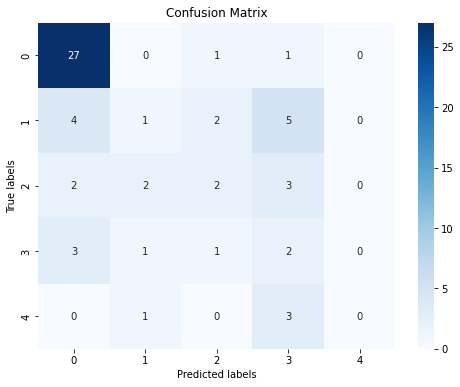

Precision: 0.46147540983606555
Recall: 0.5245901639344263
F1-Score: 0.4793017333036619


/home/olga/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.neural_network import MLPClassifier


random_foresr = MLPClassifier()
random_foresr.fit(X_train, y_train)

prediction = random_foresr.predict(X_test)

plot_confusion_matrix(y_test, prediction)
print_numerical_statistics(y_test, prediction)